In [60]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

sns.set()
np.random.seed(123)
tf.random.set_seed(1234)

In [29]:
def gen_data():
    # Quadrado com canto superio esquerdo (-3,3) e inferior direito (3, -3)
    x_range = np.linspace(-3, 3, 30)
    #produto cartesiano
    xx, yy = np.meshgrid(x_range, x_range, indexing="ij")

    x = []
    y = []
    for i in range(len(xx)):
        for j in range(len(yy)):
            dist = np.power(xx[i,j], 2) + np.power(yy[i,j], 2)
            if dist <= 2:
                if dist <= 1.0:
                    y.append((0, 1))
                    x.append((xx[i, j], yy[i,j]))
            else:
                if np.random.uniform(0,1) >= 0.3: continue
                y.append((1,0))
                x.append((xx[i, j], yy[i,j]))

    return x, y

def exibe_dados(x, y):
    for i in range(len(x)):
        #print(x[i][0], x[i][1], np.argmax(y[i]))
        c = "b" if np.argmax(y[i]) == 0 else "r"
        plt.scatter(x[i][0], x[i][1], c=c)
    plt.show()
    
def relu(x):
    return np.maximum(0,x)

In [4]:
# ----------- Internal layer: internal -----------
# Weghts:
# [[ 0.52195513  0.4885787  -1.3550941 ]
#  [-0.9346754   0.623578    0.2086937 ]]
# Bias:
# [ 0.01132941 -0.091282   -0.0703303 ]

# ----------- Internal layer: output -----------
# Weghts:
# [[ 1.0208945  -0.32919317]
#  [ 1.5268255  -0.39760086]
#  [ 0.8594049  -0.27302015]]
# Bias:
# [-0.6362609   0.87615854]

In [54]:
x, y = gen_data()

x = np.array(x)
y = np.array(y)
classes = np.argmax(y, axis=1)
colors = []
for c in classes:
    if c == 1:
        colors.append("r")
    else:
        colors.append("b")
    

l1_w = np.array([[ 0.52195513, 0.4885787, -1.3550941 ],
  [-0.9346754, 0.623578, 0.2086937 ]])
l1_b = np.array([ 0.01132941, -0.091282, -0.0703303 ])

l2_w = np.array([[ 1.0208945, -0.32919317],
  [ 1.5268255, -0.39760086],
  [ 0.8594049, -0.27302015]])
l2_b = np.array([-0.6362609, 0.87615854])

In [55]:
# primeira caamada
z_1 = np.dot(x, l1_w) + l1_b 
a_1 = relu(z_1)

# camada de saida
z_2 = np.dot(a_1, l2_w) + l2_b
a_2 = np.tanh(z_2)



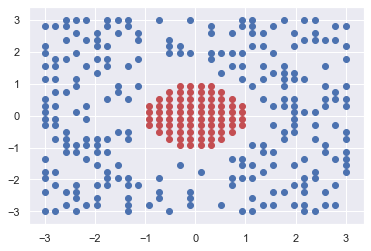

In [57]:
exibe_dados(x, y)

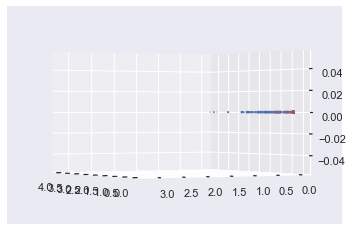

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.scatter(a_1[:, 0], a_1[:, 1], a_1[:, 2], c=colors)
ax.view_init(elev=0, azim=)
plt.show()

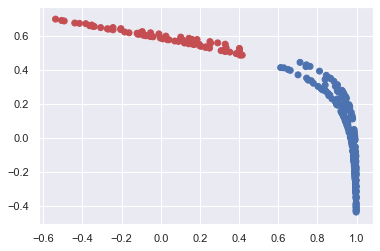

In [59]:
plt.scatter(a_2[:, 0], a_2[:, 1], c=colors)
plt.show()